# Churn Prediction using ANN

# Importing Dependencies

In [54]:
import os
import numpy as np 
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Loading the Dataset

In [55]:
df = pd.read_csv('./data/Churn.csv')

In [56]:
# Looking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
# Number of people exited
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [58]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [59]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Preprocessing

In [60]:
# Converting everything to numerical data
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [61]:
# Defining the Predictor and Response
X = df.drop(columns=['Exited'])
y = df['Exited']

In [62]:
# Training and Testing Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [63]:
# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model Building

In [64]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Training

In [66]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


200/200 [==============================] - 1s 3ms/step - loss: 0.4991 - accuracy: 0.7916 - val_loss: 0.4613 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.7975 - val_loss: 0.4380 - val_accuracy: 0.8006
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8037 - val_loss: 0.4213 - val_accuracy: 0.8087
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8086 - val_loss: 0.4071 - val_accuracy: 0.8175
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8203 - val_loss: 0.3920 - val_accuracy: 0.8288
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3831 - accuracy: 0.8381 - val_loss: 0.3776 - val_accuracy: 0.8413
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8436 - val_loss: 0.3688 - val_accuracy: 0.8462
Epoch 8/100

In [67]:
# Checking the weights and biases of the hidden layer. To check for the output layer, replace 0 with 2
model.layers[0].get_weights()

[array([[ 2.39103705e-01, -6.86210543e-02, -1.16393773e-03,
          7.40052581e-01, -4.35644537e-02, -3.12432200e-01,
         -1.16535641e-01, -8.28998908e-02,  7.29797333e-02,
          3.32242578e-01,  2.49887377e-01],
        [-2.02526614e-01,  8.92122462e-03,  4.99631226e-01,
          4.22501326e-01,  1.33381808e+00, -7.41655409e-01,
          1.22316711e-01, -4.42624658e-01, -2.50675172e-01,
         -1.30667138e+00, -4.80048433e-02],
        [-3.78953725e-01, -1.08418487e-01,  2.57911146e-01,
         -4.56152886e-01, -3.04328147e-02,  5.50074801e-02,
          4.18018773e-02,  2.05919653e-01, -1.20553069e-01,
         -7.15695143e-01, -2.64016300e-01],
        [ 1.19044155e-01, -4.24220979e-01, -5.03518939e-01,
         -5.43928862e-01,  1.63855851e-02, -8.07464778e-01,
          3.11517000e-01,  1.85922369e-01,  1.18730567e-01,
         -2.81533033e-01, -2.36156777e-01],
        [-2.47699484e-01, -1.02630687e+00, -2.07361847e-01,
          5.45194522e-02, -1.10300221e-01,  

# Testing

In [68]:
# Predicting
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [69]:
y_pred = np.where(y_log>0.5, 1, 0)

# Evaluation

In [70]:
accuracy_score(y_test, y_pred)

0.8615

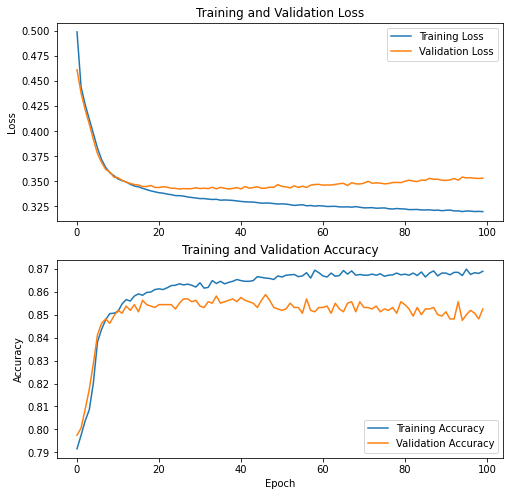

In [73]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.show()